In [1]:
import requests
import csv
import re

# Define the API URL
api_url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send a GET request to the API and retrieve the response
response = requests.get(api_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Convert the response content to JSON format
    data = response.json()

    # Extract the show information
    show_id = data["id"]
    show_url = data["url"]
    show_name = data["name"]

    # Extract the episode information
    episodes = data["_embedded"]["episodes"]

    # Initialize a list to store the extracted episode data
    episode_data = []

    # Iterate over each episode
    for episode in episodes:
        episode_id = episode["id"]
        episode_season = episode["season"]
        episode_number = episode["number"]
        episode_type = episode["type"]
        episode_airdate = episode["airdate"]
        episode_airtime = episode["airtime"]
        episode_runtime = episode["runtime"]
        episode_rating = episode["rating"]["average"]
        episode_summary = re.sub('<[^<]+?>', '', episode["summary"])  # Remove HTML tags from summary
        episode_image_medium = episode["image"]["medium"]
        episode_image_original = episode["image"]["original"]

        # Create a dictionary with the extracted episode data
        episode_info = {
            "id": episode_id,
            "url": show_url,
            "name": show_name,
            "season": episode_season,
            "number": episode_number,
            "type": episode_type,
            "airdate": episode_airdate,
            "airtime": episode_airtime,
            "runtime": episode_runtime,
            "average rating": episode_rating,
            "summary": episode_summary,
            "medium image link": episode_image_medium,
            "original image link": episode_image_original
        }

        # Append the episode data dictionary to the list
        episode_data.append(episode_info)

    # Specify the CSV file path
    csv_file = "episode_data.csv"

    # Write the episode data to the CSV file
    with open(csv_file, mode="w", newline="", encoding="utf-8") as file:
        writer = csv.DictWriter(file, fieldnames=episode_data[0].keys())
        writer.writeheader()
        writer.writerows(episode_data)

    print("Data successfully saved to episode_data.csv")

else:
    # Print an error message if the request was not successful
    print("Error: Failed to retrieve data from the API.")


Data successfully saved to episode_data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("episode_data.csv")

In [5]:
# Convert the "airdate" column to datetime format
df["airdate"] = pd.to_datetime(df["airdate"])

In [6]:
# 1. Compare ratings for each season
season_ratings = df.groupby("season")["average rating"].mean()


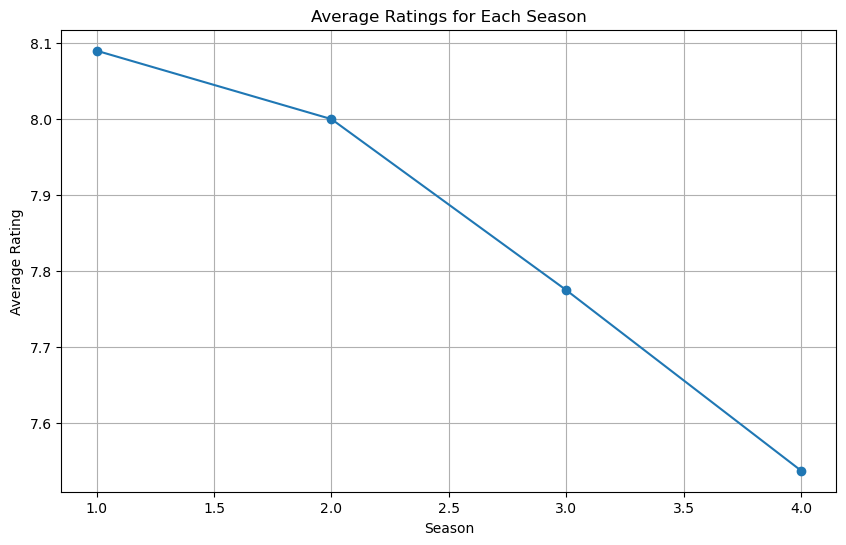

In [7]:
# Plot ratings for each season
plt.figure(figsize=(10, 6))
plt.plot(season_ratings.index, season_ratings.values, marker="o")
plt.xlabel("Season")
plt.ylabel("Average Rating")
plt.title("Average Ratings for Each Season")
plt.grid(True)
plt.show()

In [8]:
# 2. Get episode names with average rating > 8 for each season
high_rating_episodes = df[df["average rating"] > 8]
high_rating_episodes_by_season = high_rating_episodes.groupby("season")["name"].apply(list)

In [18]:
# Print episode names with average rating > 8 for each season
for season, episodes in high_rating_episodes_by_season.items():
    print(f"Season {season} High Rating Episodes: {', '.join(episodes)}")


Season 1 High Rating Episodes: Westworld, Westworld, Westworld
Season 2 High Rating Episodes: Westworld, Westworld, Westworld


In [10]:
# 3. Get episode names aired before May 2019
episodes_before_may_2019 = df[df["airdate"] < pd.to_datetime("2019-05-01")]
episode_names_before_may_2019 = episodes_before_may_2019["name"].tolist()

In [11]:
# Print episode names aired before May 2019
print("Episode Names Aired Before May 2019:")
for episode_name in episode_names_before_may_2019:
    print(episode_name)

Episode Names Aired Before May 2019:
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld
Westworld


In [12]:
# 4. Get episode names with highest and lowest rating for each season
highest_rated_episodes = df.groupby("season").apply(lambda x: x.loc[x["average rating"].idxmax()]["name"])
lowest_rated_episodes = df.groupby("season").apply(lambda x: x.loc[x["average rating"].idxmin()]["name"])

In [17]:
# Print episode names with highest and lowest rating for each season
for season, episode_name in highest_rated_episodes.items():
    print(f"Season {season} Highest Rated Episode: {episode_name}")
for season, episode_name in lowest_rated_episodes.items():
    print(f"Season {season} Lowest Rated Episode: {episode_name}")


Season 1 Highest Rated Episode: Westworld
Season 2 Highest Rated Episode: Westworld
Season 3 Highest Rated Episode: Westworld
Season 4 Highest Rated Episode: Westworld
Season 1 Lowest Rated Episode: Westworld
Season 2 Lowest Rated Episode: Westworld
Season 3 Lowest Rated Episode: Westworld
Season 4 Lowest Rated Episode: Westworld


In [14]:
# 5. Get summary for the most popular (highest ratings) episode in each season
most_popular_episodes = df.groupby("season").apply(lambda x: x.loc[x["average rating"].idxmax()]["summary"])

In [16]:
# Print summary for the most popular episode in each season
for season, episode_summary in most_popular_episodes.items():
    print(f"Season {season} Most Popular Episode Summary:")
    print(episode_summary)
    print("\n")

Season 1 Most Popular Episode Summary:
Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.


Season 2 Most Popular Episode Summary:
Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.


Season 3 Most Popular Episode Summary:
If you're stuck in a loop, try walking in a straight line.


Season 4 Most Popular Episode Summary:
God is bored.


